In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test_df = pd.read_csv('C:/Users/ivc101-105/Downloads/test.csv')
train_df = pd.read_csv('C:/Users/ivc101-105/Downloads/train.csv')

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_df.set_index('PassengerId', inplace=True)

In [5]:
train_df.set_index('PassengerId', inplace=True)

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2})

train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2})

In [8]:
test_df['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [9]:
test_df['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [10]:
test_df = test_df.drop(columns='Ticket')

train_df = train_df.drop(columns='Ticket')

In [11]:
test_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [12]:
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})

In [13]:
test_df = test_df.drop(columns='Name')

train_df = train_df.drop(columns='Name')

In [14]:
test_df['Cabin']

PassengerId
892      NaN
893      NaN
894      NaN
895      NaN
896      NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 418, dtype: object

In [15]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 29.4+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 29.4+ KB


In [18]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [19]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [20]:
train_df['Cabin_available'] = np.where(train_df['Cabin'].isnull(), 0,1)

test_df['Cabin_available'] = np.where(test_df['Cabin'].isnull(), 0,1)

In [22]:
train_df['Embarked'].replace(np.nan, 'S', inplace = True)

test_df['Embarked'].replace(np.nan, 'S', inplace = True)

In [29]:
test_df.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Cabin_available    0
dtype: int64

In [24]:
test_df = test_df.drop(columns='Cabin')

train_df = train_df.drop(columns='Cabin')

In [27]:
test_df['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [28]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [31]:
test_df.drop_duplicates(ignore_index=True, inplace=True)
train_df.drop_duplicates(ignore_index=True, inplace=True)

<AxesSubplot:>

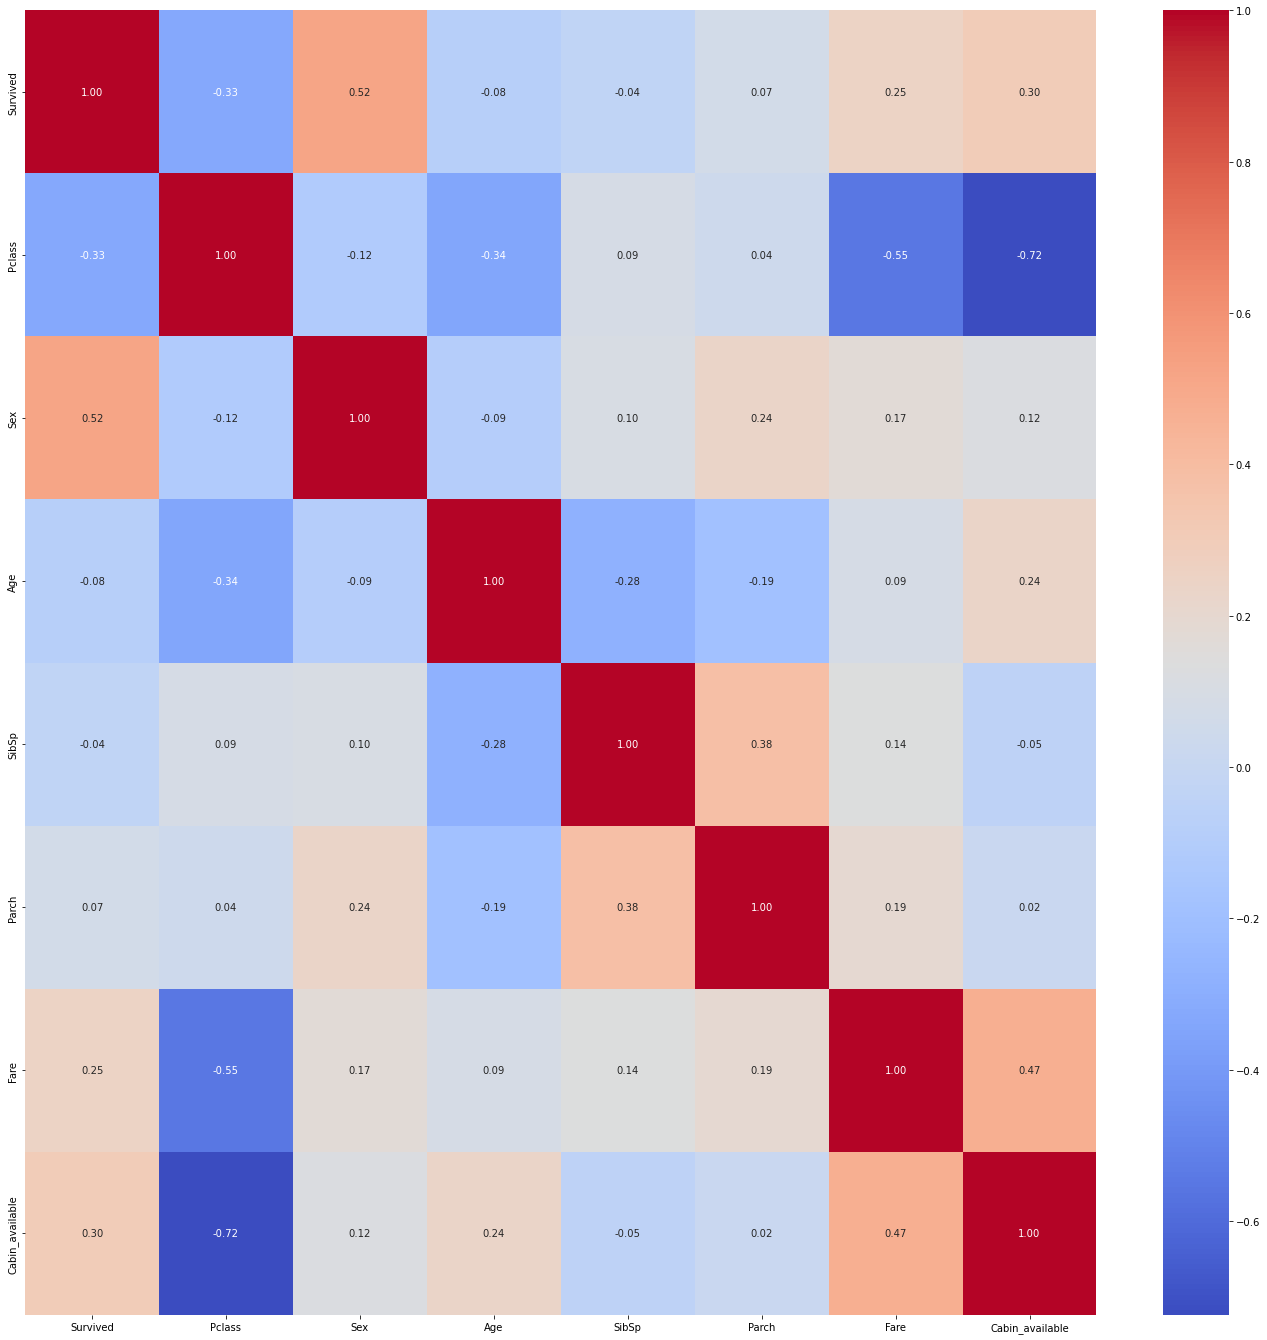

In [32]:

corr = train_df.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')